In [17]:
import tensorflow  as tf
# import tensorflow_recommenders as tfrs
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import random

import jsonfify

In [45]:
model_random = tf.keras.models.load_model("../models/food_classifier.keras")

In [47]:
# read the data
food_data = pd.read_excel("../data/recommendartion_data/finalIndonesia_data.xlsx")
food_data.drop("Unnamed: 0", inplace = True, axis = 1)
# replace the ID with int value 
for i in range(len(food_data)): 
    food_data.loc[i, 'resep_id'] = i + 1
food_data.head()

,resep_id,nama_makanan,nama_gizi,kandungan_nutrisi,kategori
0,1,daging rendang,"Protein (g), Energi (kKal), Karbohidrat (g), T...","228.6072, 3442.2196, 126.463, 227.5751",Indonesia
1,2,Terong Pedas (Terong Balado),"Protein (g), Energi (kKal), Karbohidrat (g), T...","2.4267, 698.2169, 26.8406, 68.3922",Indonesia
2,3,Cara Membuat Sate Daging Sapi,"Protein (g), Energi (kKal), Karbohidrat (g), T...","193.938, 2396.4036, 74.3372, 145.9531",Indonesia
3,4,Sate Babi Indonesia,"Protein (g), Energi (kKal), Karbohidrat (g), T...","179.1272, 1647.3999, 47.8303, 84.596",Indonesia
4,5,Udang Sambal Pedas,"Protein (g), Energi (kKal), Karbohidrat (g), T...","84.9721, 1067.8366, 49.9121, 62.3498",Indonesia


In [19]:

# read the dataset
data_ratings = pd.read_csv("../data/recommendartion_data/ratings.csv")
#  read the ratings
data_ratings = data_ratings.rename(columns={"movieId" : "resep_id"})
# drope labels that are not really used 
data_ratings.drop(labels = 'timestamp', inplace=True, axis = 1)
data_ratings.head()

,userId,resep_id,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [20]:
# merge the ratings and food_data
final_data = food_data.merge(data_ratings, how = "inner",  on = "resep_id").sort_values(by = "userId")
# final_data = pd.concat([data_ratings, food_data], axis=0)
final_data

,resep_id,nama_makanan,nama_gizi,kandungan_nutrisi,kategori,userId,rating
0,1,daging rendang,"Protein (g), Energi (kKal), Karbohidrat (g), T...","228.6072, 3442.2196, 126.463, 227.5751",Indonesia,1,4.0
7860,296,Rendang Padang - Kari Daging Sapi Indonesia (S...,"Protein (g), Energi (kKal), Karbohidrat (g), T...","278.9743, 2115.1029, 36.9886, 93.694",Indonesia,1,3.0
6853,260,Sayur Taucho,"Protein (g), Energi (kKal), Karbohidrat (g), T...","2271.5546, 28266.7279, 3916.4228, 865.7599",Indonesia,1,5.0
6368,235,Kari Daging Sapi Indonesia Dengan Nasi Kelapa,"Protein (g), Energi (kKal), Karbohidrat (g), T...","171.796, 1794.887, 61.2606, 102.0414",Indonesia,1,4.0
6192,231,Tenderloin Babi Indonesia,"Protein (g), Energi (kKal), Karbohidrat (g), T...","98.4191, 598.257, 9.9387, 16.5197",Indonesia,1,5.0
...,...,...,...,...,...,...,...
8166,296,Rendang Padang - Kari Daging Sapi Indonesia (S...,"Protein (g), Energi (kKal), Karbohidrat (g), T...","278.9743, 2115.1029, 36.9886, 93.694",Indonesia,610,5.0
214,1,daging rendang,"Protein (g), Energi (kKal), Karbohidrat (g), T...","228.6072, 3442.2196, 126.463, 227.5751",Indonesia,610,5.0
4436,153,Pancit Guisado Filipina (Mie Goreng dengan dag...,"Protein (g), Energi (kKal), Karbohidrat (g), T...","164.0411, 2357.0216, 368.3591, 23.2857",Indonesia,610,3.0
10347,356,Kari Daging Sapi Indonesia,"Protein (g), Energi (kKal), Karbohidrat (g), T...","139.2323, 3464.0288, 379.4381, 159.3442",Indonesia,610,3.0


In [21]:
#  save the final file
final_data.to_excel("../data/recommendartion_data/final_data.xlsx")

In [22]:
# read the data
df = pd.read_excel("../data/recommendartion_data/final_data.xlsx", index_col=0)
df.head(10)

,resep_id,nama_makanan,nama_gizi,kandungan_nutrisi,kategori,userId,rating
0,1,daging rendang,"Protein (g), Energi (kKal), Karbohidrat (g), T...","228.6072, 3442.2196, 126.463, 227.5751",Indonesia,1,4.0
7860,296,Rendang Padang - Kari Daging Sapi Indonesia (S...,"Protein (g), Energi (kKal), Karbohidrat (g), T...","278.9743, 2115.1029, 36.9886, 93.694",Indonesia,1,3.0
6853,260,Sayur Taucho,"Protein (g), Energi (kKal), Karbohidrat (g), T...","2271.5546, 28266.7279, 3916.4228, 865.7599",Indonesia,1,5.0
6368,235,Kari Daging Sapi Indonesia Dengan Nasi Kelapa,"Protein (g), Energi (kKal), Karbohidrat (g), T...","171.796, 1794.887, 61.2606, 102.0414",Indonesia,1,4.0
6192,231,Tenderloin Babi Indonesia,"Protein (g), Energi (kKal), Karbohidrat (g), T...","98.4191, 598.257, 9.9387, 16.5197",Indonesia,1,5.0
5940,223,Drum Ayam Manis,"Protein (g), Energi (kKal), Karbohidrat (g), T...","956.1837, 10441.735, 4.7206, 701.5553",Indonesia,1,3.0
5853,216,Salad Indonesia KD Lang Dengan Saus Kacang Pedas,"Protein (g), Energi (kKal), Karbohidrat (g), T...","22.4818, 739.6693, 36.6404, 62.2456",Indonesia,1,5.0
4722,163,Mission Street Marinasi Bengkuang & Acar Jalapeno,"Protein (g), Energi (kKal), Karbohidrat (g), T...","98.5908, 944.2484, 112.0988, 3.3785",Indonesia,1,5.0
4458,157,Perkedel Resep Asli Indonesia,"Protein (g), Energi (kKal), Karbohidrat (g), T...","4258.15, 128869.6, 26037.405, 586.305",Indonesia,1,5.0
4254,151,Sambal Belacan,"Protein (g), Energi (kKal), Karbohidrat (g), T...","40.127, 1177.9165, 275.9378, 1.6212",Indonesia,1,5.0


In [23]:
df.dtypes

resep_id               int64
nama_makanan          object
nama_gizi             object
kandungan_nutrisi     object
kategori              object
userId                 int64
rating               float64
dtype: object

In [24]:
df.isnull().sum()

resep_id             0
nama_makanan         0
nama_gizi            0
kandungan_nutrisi    0
kategori             0
userId               0
rating               0
dtype: int64

In [25]:
# top 10 ratings food 
data_grouped = final_data.groupby("nama_makanan")['rating'].mean().sort_values(ascending = False)[:10]
data_grouped

nama_makanan
Tempe Manis dan Pedas                                    5.000000
Pancake Pisang, Resep Wayan                              5.000000
Perkedel Indonesia                                       5.000000
Kari Ayam Kelapa (kari ayam dengan kelapa panggang)      4.500000
Ayam Bakar Indonesia                                     4.429022
Salad Indonesia Kd Lang                                  4.375000
Perkedel Djagung ( Udang dan Jagung Goreng Indonesia)    4.307692
Fillet Daging Sapi dalam Kelapa                          4.293103
Sup Wortel Indonesia                                     4.250000
Bahmi Goreng Indonesia                                   4.237745
Name: rating, dtype: float64

In [26]:
EMBEDDING_SIZE = 100
# IMPORTANT : pleae read the documentation for register the custom class model to avoid error
# documentation for custom class : https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/serialization_and_saving.ipynb#config_methods
# clear the previoues custom objects
keras.saving.get_custom_objects().clear()
# register the custom layer 
@keras.saving.register_keras_serializable(package="RecomendationLayer")
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_fooods, embedding_size, **kwargs):
        super().__init__(**kwargs)
        self.num_users = num_users
        self.num_fooods = num_fooods
        self.embedding_size = embedding_size
        # first hidden layer
        self.dense1 = tf.keras.layers.Dense(128, activation="relu")
        #  second hidden layer
        self.dense2 = tf.keras.layers.Dense(64, activation="relu")
        # third hidden layer
        self.dense3 = tf.keras.layers.Dense(1, activation="sigmoid")
        # embedding layer for user vector
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            # embedding size = user vector
            embedding_size,
            # set the weight to standart normalization and thhe output shape of array will sane like num_users.embedidng size
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
        )
        # adding user_bias
        self.user_bias = tf.keras.layers.Embedding(num_users, 1)
        # embedding layer for food vector
        self.food_embedding = tf.keras.layers.Embedding(
            num_fooods,
            embedding_size,
            # set the weight to standart normalization and thhe output shape of array will sane like num_users.embedidng size
            embeddings_initializer="he_normal",
            embeddings_regularizer= tf.keras.regularizers.l2(1e-6),
        )
        self.food_bias = tf.keras.layers.Embedding(num_fooods, 1)
    
    def call(self, inputs):
        # user vector
        user_vector = self.user_embedding(inputs[:, 0])
        # user bias
        user_bias = self.user_bias(inputs[:, 0])
        food_vector = self.food_embedding(inputs[:, 1])
        food_bias = self.food_bias(inputs[:, 1])
        # set the dfimension to 2D dimensio
        dot_user_movie = tf.tensordot(user_vector, food_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + food_bias
        #  first dense layer
        dense_layer1 = self.dense1(x)
        dense_layer2 = self.dense2(dense_layer1)
        # return the output layer
        return self.dense3(dense_layer2)
    
    #  adding some config
    def get_config(self):
        #  call the main config
        config = super().get_config()
        # update to config, to initialize the self.num_users = num_users, self.num_fooods = num_fooods self.embedding_size = embedding_size
        config.update({
            # all the configuration forr new config
            "num_users": self.num_users,
            "num_fooods": self.num_fooods,
            "embedding_size": self.embedding_size,
        })
        #  return the config
        return config
    
    # for class method
    @classmethod
    def from_config(cls, config):
        return  cls( **config)


In [27]:
# for dataframe use apply
def get_train_test_data(df : pd.DataFrame): 
    x = df[['userId', 'resep_id']].values
    # train len
    train_len = int(0.9 * df.shape[0])
    max_rating = max(df["rating"])
    # normalization
    y = df['rating'].apply(lambda x: x / max_rating).values
    #  train and test dataset
    x_train, x_test, y_train, y_test = (
        x[:train_len],
        x[train_len:],
        y[:train_len],
        y[train_len:],
    )
    return x_train, x_test, y_train, y_test 
# function for getting length of unique user id and foo id
def get_food_user_len(df : pd.DataFrame): 
    #  len user
    len_user = len(df['userId'].unique().tolist())
    # len nama makanan
    len_nama_makanan = len(df['resep_id'].unique().tolist())
    return len_user, len_nama_makanan

def create_and_train_model(x_train, x_test, y_train, y_test, len_user, len_nama_makanan): 
    # call the model class
    model = RecommenderNet(len_user, len_nama_makanan, EMBEDDING_SIZE)
    # compile model 
    model.compile(
        # loss function
        loss=tf.keras.losses.BinaryCrossentropy(),
        # optimizer
        optimizer='adam',
        # metrics
        metrics = [tf.keras.metrics.MeanSquaredError()]
    )
    # start to train the model 
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=64,
        epochs=100,
        verbose=1,
        validation_data=(x_test, y_test),

    )
    return model, history 

def display_predictiom(model, x_test, y_test, nums = 10):
    # the prediction
    pred = model.predict(x_test)
    # loop for model predcition 
    for i in range(nums): 
        print(f'predict : {pred[i] * 5.0}')
        print(f'actual : {y_test[i] *  5.0}')
        print('====================================')
    # return to prediction 
    return pred


len_user, len_nama_makanan = get_food_user_len(df)
x_train, x_test, y_train, y_test  = get_train_test_data(df)
model, history = create_and_train_model(x_train, x_test, y_train, y_test, len_user, len_nama_makanan)
model.save("recommendation_model.keras")
# model.save_weights("./recommendation_model.weights.h5")
display_predictiom(model, x_test, y_test, 20)


Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6348 - mean_squared_error: 0.0607 - val_loss: 0.6278 - val_mean_squared_error: 0.0448
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6046 - mean_squared_error: 0.0447 - val_loss: 0.6319 - val_mean_squared_error: 0.0470
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5985 - mean_squared_error: 0.0444 - val_loss: 0.6284 - val_mean_squared_error: 0.0452
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6014 - mean_squared_error: 0.0454 - val_loss: 0.6292 - val_mean_squared_error: 0.0457
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5984 - mean_squared_error: 0.0435 - val_loss: 0.6290 - val_mean_squared_error: 0.0456
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5981 - mean_squared_error: 0.0433 - val_loss: 0.6266 - val_mean_squared_error: 0.0445
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5987 - mean_squared_error: 0.0435 - val_los

array([[0.83408123],
       [0.79052603],
       [0.8395894 ],
       ...,
       [0.60000294],
       [0.73669744],
       [0.78946626]], dtype=float32)

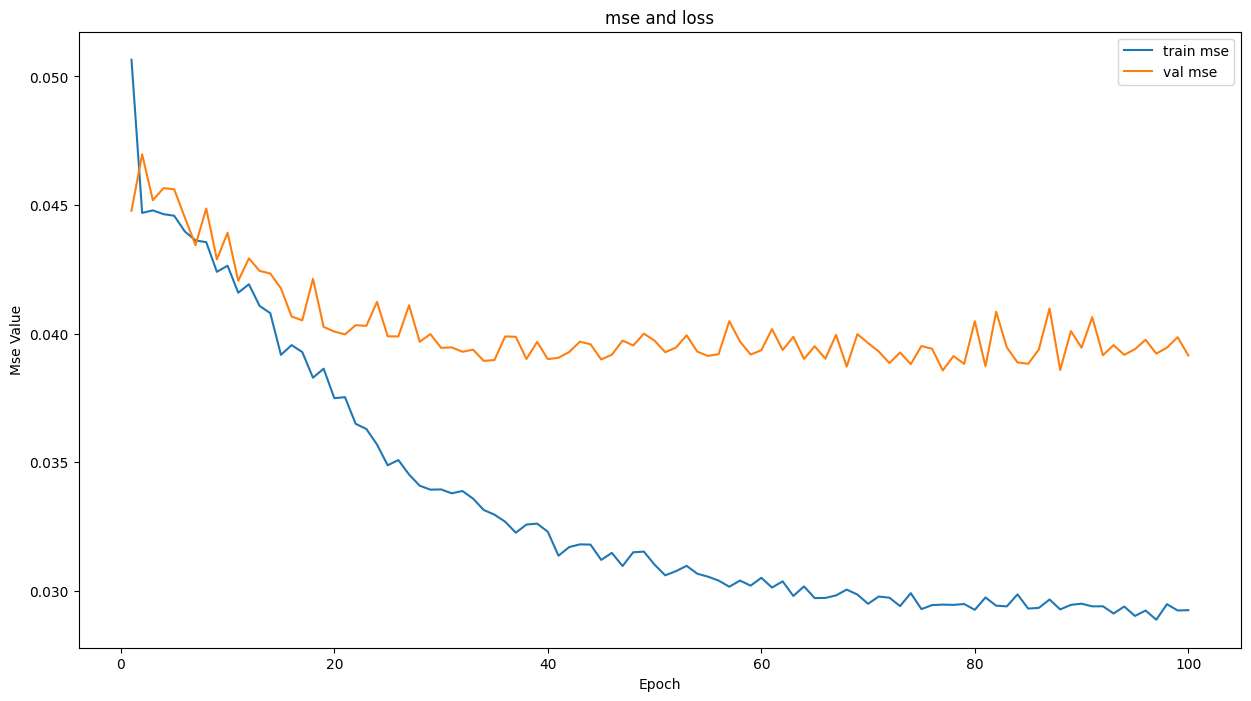

In [28]:
# fig  = plt.figure(figsize=(20, 10))
fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15, 8))
ax1.plot([x for x in range(1, 101)], history.history['mean_squared_error'], label = "train mse")
ax1.plot([x for x in range(1, 101)], history.history['val_mean_squared_error'], label = "val mse")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Mse Value')
ax1.set_title("mse and loss")
ax1.legend()
plt.show()


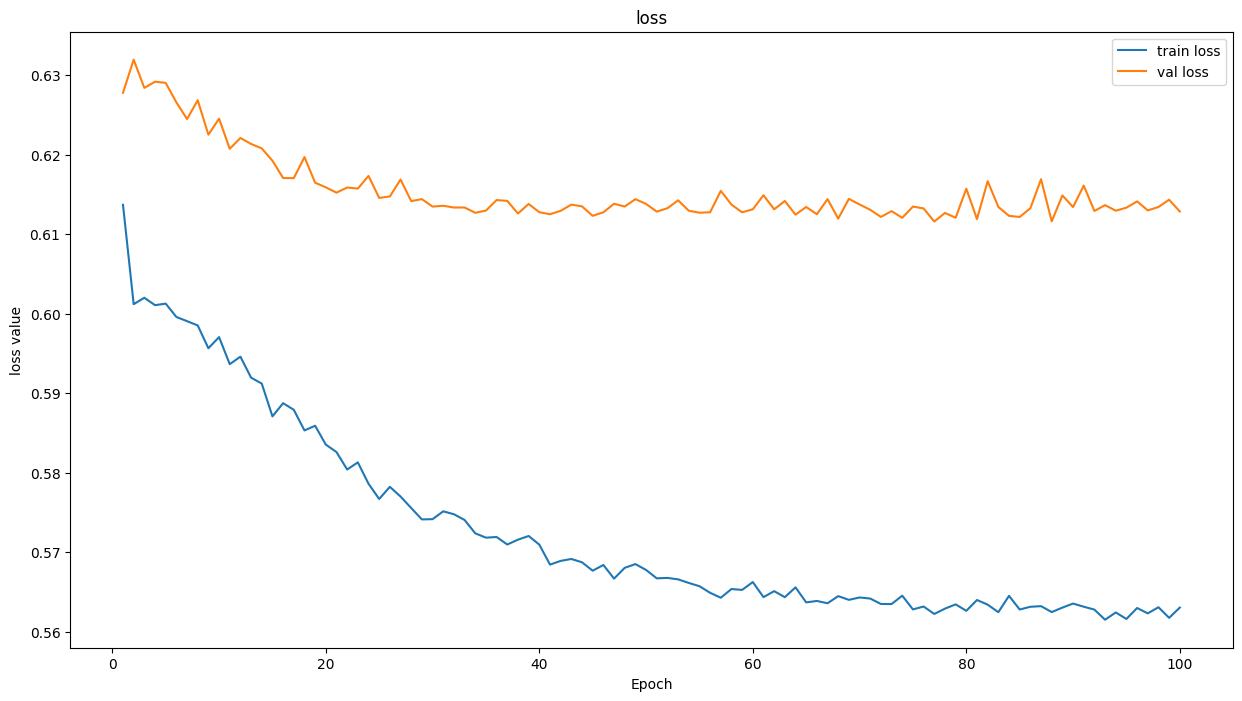

In [29]:
fig, ax1 = plt.subplots(1, 1, sharey=True, figsize=(15, 8))
ax1.plot([x for x in range(1, 101)], history.history['loss'], label = "train loss")
ax1.plot([x for x in range(1, 101)], history.history['val_loss'], label = "val loss")
ax1.set_xlabel('Epoch')
ax1.set_ylabel('loss value')
ax1.set_title("loss")
ax1.legend()
plt.show()

In [30]:
# load custom model 
reconstructed_model = keras.models.load_model(
    "./recommendation_model.keras",
    custom_objects={"RecomendationLayer": RecommenderNet}
)
#  dping prediction
print(len(reconstructed_model.predict(x_test)))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1047


In [33]:

data2 = pd.read_excel("../data/recommendartion_data/final_data.xlsx")
# read data and remove the duplicate 
data2.drop_duplicates(subset=['resep_id'], inplace = True)
data2.shape

(318, 8)

In [34]:
def prediction_for_spesific_user(model, df: pd.DataFrame): 
    # random user_id
    user_id = random.randint(a = 9999, b = 99999)
    all_prediction = []
    # recipe_id_uniques = np.unique(df.loc[:, 'resep_id'])
    for i in range(df.shape[0]): 
        print(f'product id : {i}')
        all_prediction.append(model.predict(np.array([[user_id, i]]))[0][0] * 5)
    # this will sort the ratings from higher to lower
    all_prediction = np.argsort(all_prediction)[::-1]
    return all_prediction 

def list_of_recomendation_food(index, df: pd.DataFrame):
    # the final recomendation
    foods = []
    for i in index: 
        foods.append(df.iloc[i]['nama_makanan'])
    return foods


In [35]:
index = prediction_for_spesific_user(reconstructed_model, data2)

product id : 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
product id : 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
product id : 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
product id : 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
product id : 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
product id : 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
product id : 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
product id : 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
product id : 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
product id : 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
product id : 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
product id : 18
1/1 ━━━━━━━━━━━━━━━━━━

In [36]:
foods =list_of_recomendation_food(index, data2)
foods

['Ikan Pedas Indonesia',
 'Ayam Indonesia Mudah',
 'Ayam Indonesia',
 'Sambal Cabai (Saus Cabai Indonesia)',
 'Perkedel Kentang dan Daging Sapi Indonesia',
 'Nasi Kuning Gurih',
 'Bolu kukus',
 'Saus Barbekyu Indonesia',
 'Crock Pot Daging Sapi atau Babi Indonesia',
 'Tahu Mengkilap Dengan Mutiara Sriracha yang Berapi-api',
 'Kenikmatan Jakarta',
 'Sup Mie Ayam Indonesia (Soto Ayam)',
 'Perkedel Djagung ( Udang dan Jagung Goreng Indonesia)',
 'Sate Babi Indonesia',
 'Sate Ayam Indonesia Dengan Saus Kacang',
 'Ayam Pedas Panggang (Ala Padang)',
 'Nasi Indonesia (gurih)',
 'Cumi Cumi Smoor (Cumi dengan Saus Tomat dan Cengkih)',
 'Sup Wortel Indonesia',
 'Kari Nanas Indonesia',
 'Steak Rebus, Gaya Indonesia',
 'Ayam Indonesia Erin',
 'Rendang',
 'Lapis Legit (Kue Seribu Lapis)',
 'Jus Alpokat (Minuman Alpukat khas indonesia)',
 'Acar Campur (Acar Sayuran)',
 'Soda Gembira (Soda Bahagia)',
 'Kecap Ala Indonesia IndoCook',
 'Salad Indonesia KD Lang Dengan Saus Kacang Pedas',
 'Jeruk Nipis',

In [37]:
iter = 0
for i in data2['nama_makanan']: 
    if i == "Ayam Bakar Indonesia": 
        print(iter)
        break
    iter += 1

21


In [38]:
# print(len(reconstructed_model.predict(x_test)))
reconstructed_model.predict(np.array([[1000,21]])) * 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[3.5495613]], dtype=float32)